In [5]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("diabetes.csv", header=None, names=col_names)

SyntaxError: ignored

#After loading the data, we understand the structure & variables, determine the target & feature variables (dependent & independent variables respectively)

In [2]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

#Let’s divide the data into training & testing sets in the ratio of 80:20.

In [3]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 70% training and 30% test

#Performing The decision tree analysis using scikit learn

In [39]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()

In [41]:
#K-fold CV
from sklearn.model_selection import cross_val_score
accuraccies = cross_val_score(estimator = DTC, X= X_train, y=y_train, cv=55)
print("Average Accuracies: ",np.mean(accuraccies))
print("Standart Deviation Accuracies: ",np.std(accuraccies))

Average Accuracies:  0.7674825174825175
Standart Deviation Accuracies:  0.12398927664516426


In [42]:
DTC.fit(X_train,y_train) #learning
#prediciton
print("Decision Tree Score: ",DTC.score(X_test,y_test))
DTCscore = DTC.score(X_test,y_test)

Decision Tree Score:  0.696969696969697


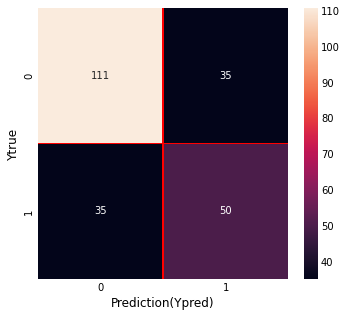

In [44]:
#Confusion Matrix

yprediciton5= DTC.predict(X_test)
ytrue = y_test

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediciton5)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

In [45]:
DTf1=f1_score(ytrue, yprediciton5, average='weighted') 
DTf1

0.6969696969696971

In [4]:
# Create Decision Tree classifier object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifier
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

ValueError: ignored

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [7]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [10]:
df = pd.read_csv("/content/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
# making a list of columns with total number of missing values
print('Column'+ '\t\t\t\t Total missing Values'+'\t\t\t\t % of missing values')
#print("\n")
for i in df.columns:
    print(f"{i: <50}{df[i].isnull().sum():<30}{((df[i].isnull().sum())*100)/df.shape[0]: .2f}")

Column				 Total missing Values				 % of missing values
Pregnancies                                       0                              0.00
Glucose                                           5                              0.65
BloodPressure                                     35                             4.56
SkinThickness                                     227                            29.56
Insulin                                           374                            48.70
BMI                                               11                             1.43
DiabetesPedigreeFunction                          0                              0.00
Age                                               0                              0.00
Outcome                                           0                              0.00


In [12]:
df["Glucose"].fillna(df["Glucose"].mean(), inplace = True)
df["BloodPressure"].fillna(df["BloodPressure"].mean(), inplace = True)
df["SkinThickness"].fillna(df["SkinThickness"].mean(), inplace = True)
df["Insulin"].fillna(df["Insulin"].mean(), inplace = True)
df["BMI"].fillna(df["BMI"].mean(), inplace = True)

In [13]:
# making a list of columns with total number of missing values
print('Column'+ '\t\t\t\t Total missing Values'+'\t\t\t\t % of missing values')
#print("\n")
for i in df.columns:
    print(f"{i: <50}{df[i].isnull().sum():<30}{((df[i].isnull().sum())*100)/df.shape[0]:.2f}")

Column				 Total missing Values				 % of missing values
Pregnancies                                       0                             0.00
Glucose                                           0                             0.00
BloodPressure                                     0                             0.00
SkinThickness                                     0                             0.00
Insulin                                           0                             0.00
BMI                                               0                             0.00
DiabetesPedigreeFunction                          0                             0.00
Age                                               0                             0.00
Outcome                                           0                             0.00


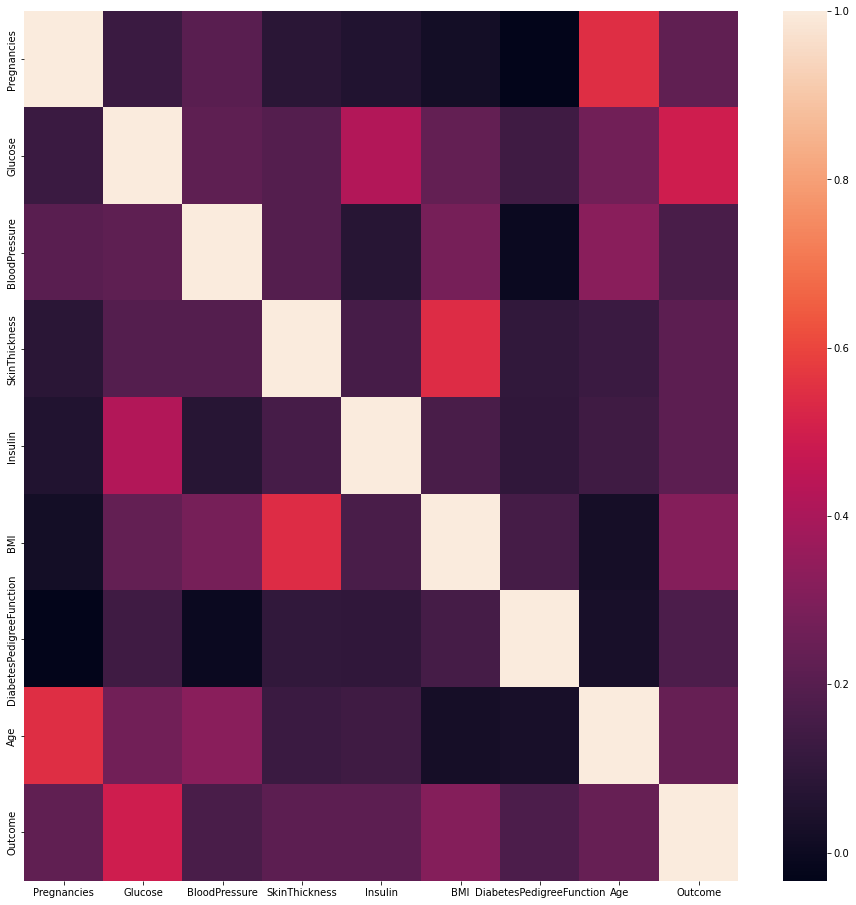

In [14]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr())

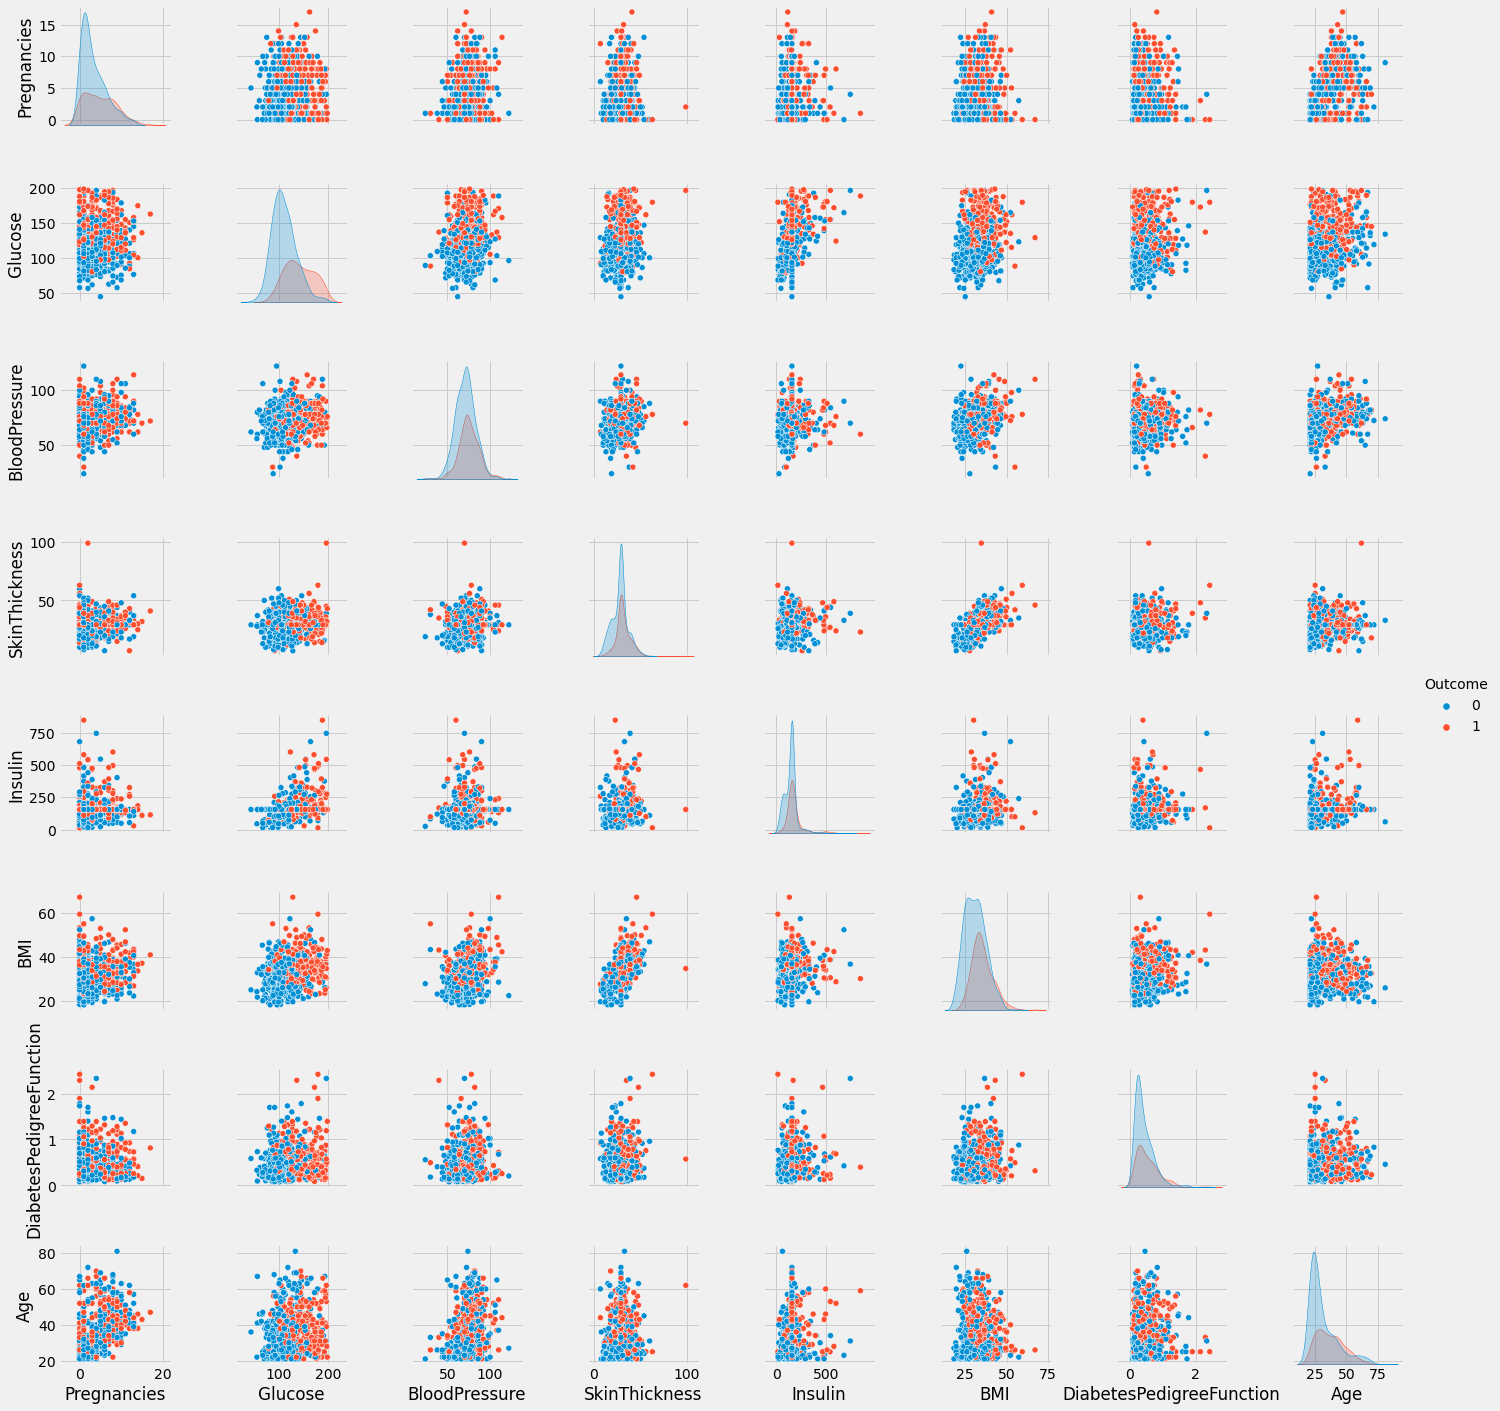

In [15]:
plt.style.use("fivethirtyeight")
sns.pairplot(df, hue="Outcome")

In [16]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']

#modeling random forest

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=1)

In [18]:
from sklearn.preprocessing import StandardScaler
scaling_x=StandardScaler()
X_train=scaling_x.fit_transform(X_train)
X_test=scaling_x.transform(X_test)

In [19]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [20]:
model.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1])

In [21]:
model.score(X_test, y_test)

0.7922077922077922

#Plotting Decision Boundaries

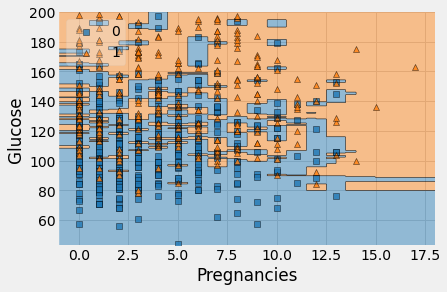

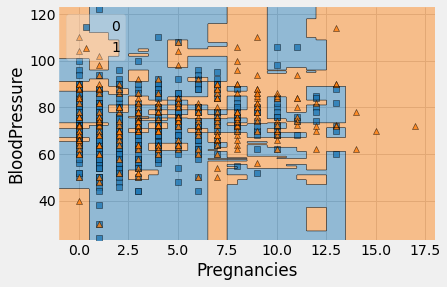

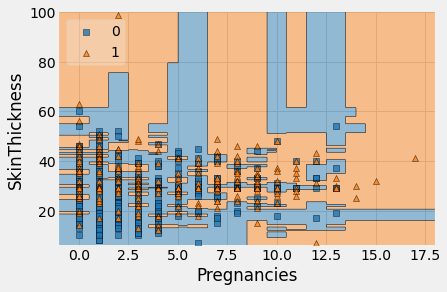

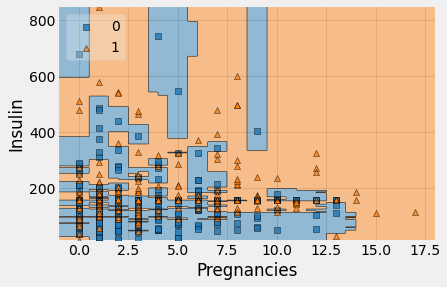

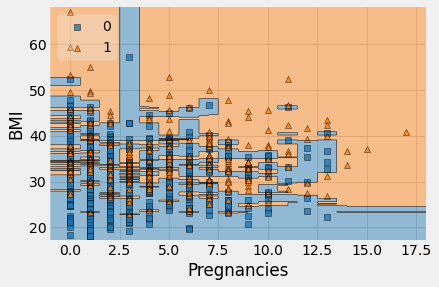

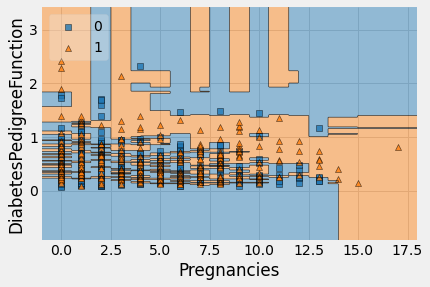

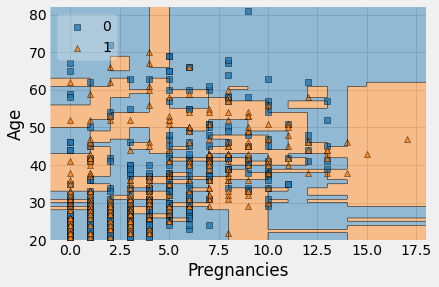

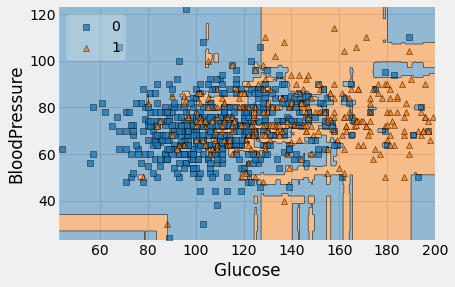

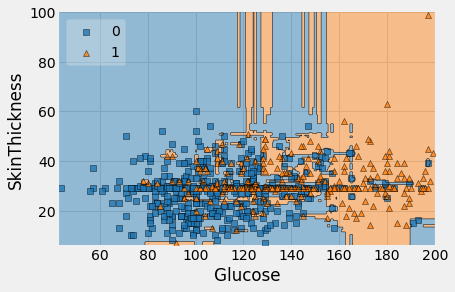

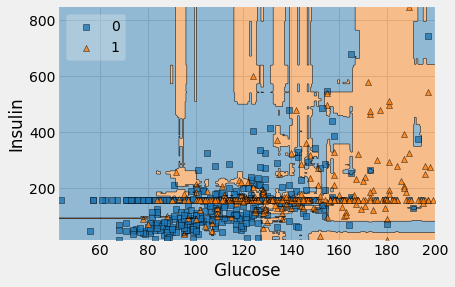

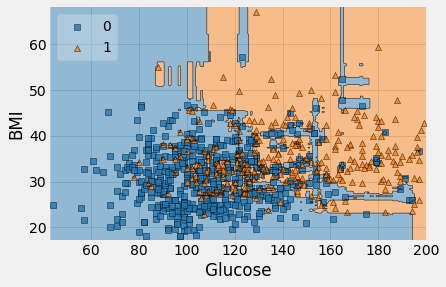

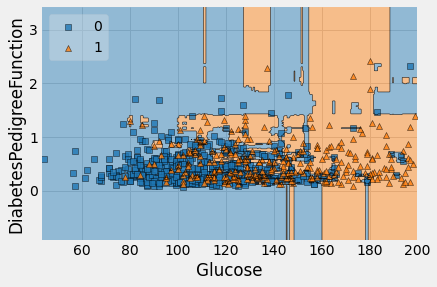

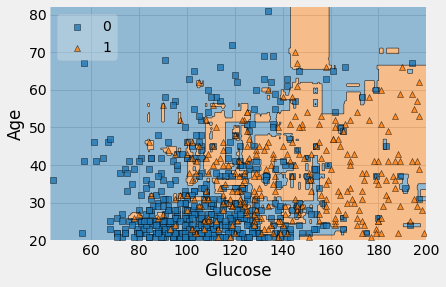

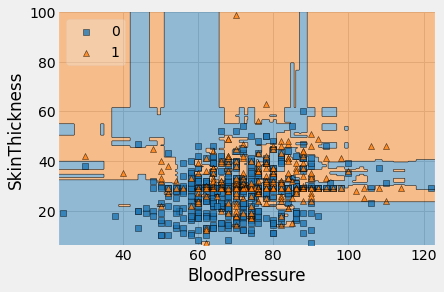

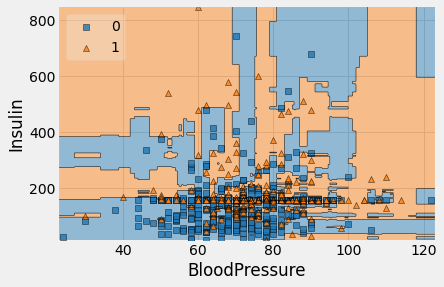

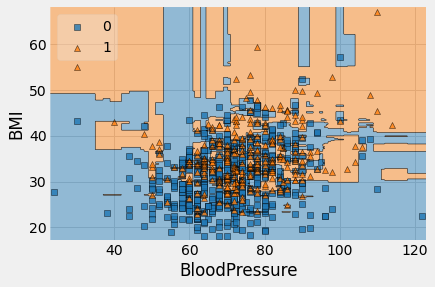

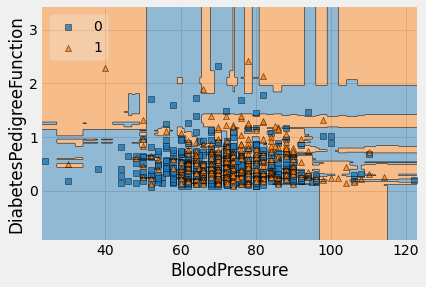

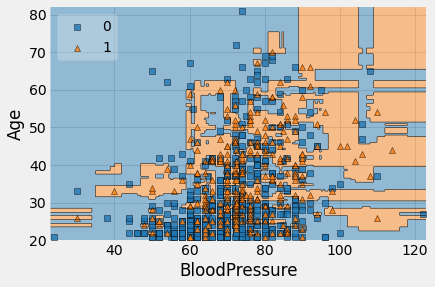

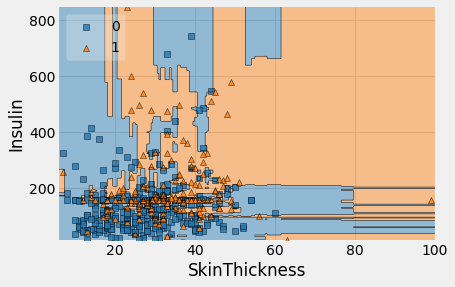

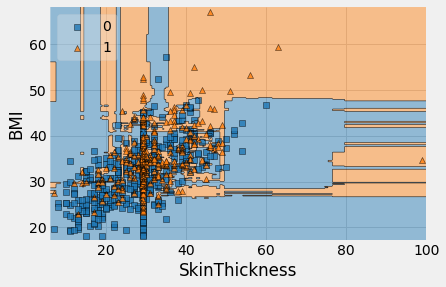

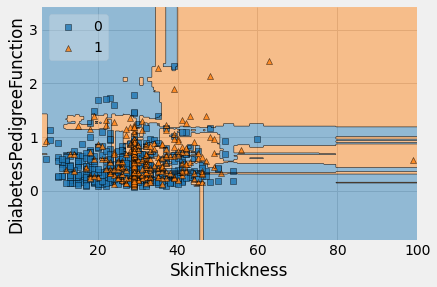

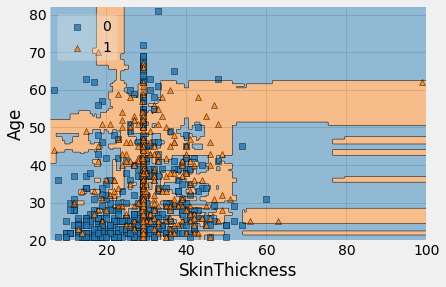

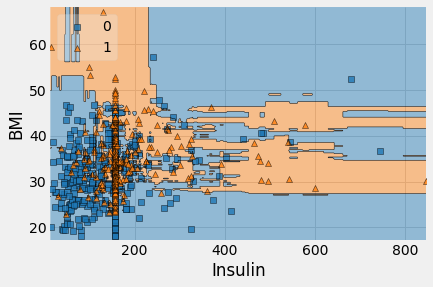

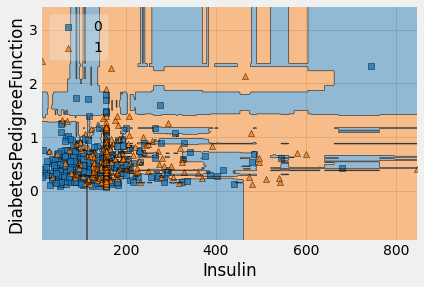

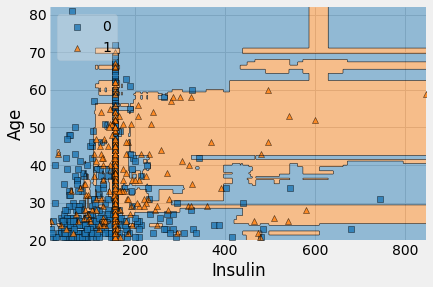

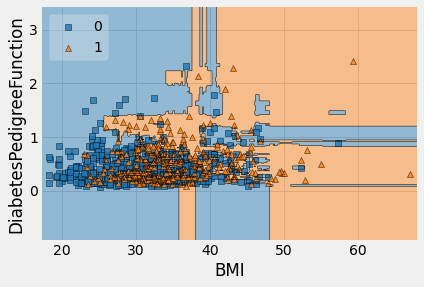

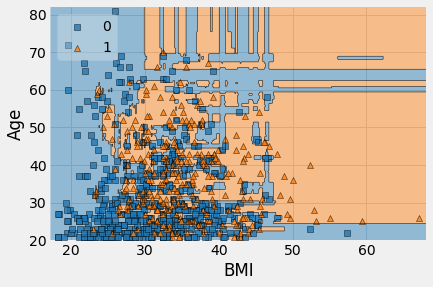

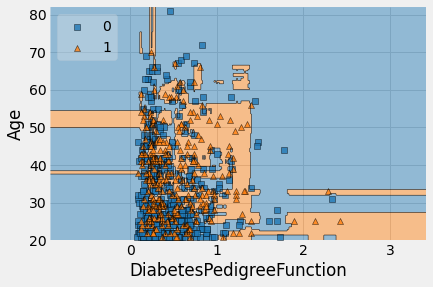

In [22]:
 from mlxtend.plotting import plot_decision_regions
def classify_with_rfc(X,Y):
    x = df[[X,Y]].values
    y = df['Outcome'].astype(int).values
    model = RandomForestClassifier()
    model = RandomForestClassifier()
    model.fit(x,y)
    # Plotting decision region
    plot_decision_regions(x, y, clf=model, legend=2)
    # Adding axes annotations
    plt.xlabel(X)
    plt.ylabel(Y)
    plt.show()
    
feat = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
size = len(feat)
for i in range(0,size):
    for j in range(i+1,size):
        classify_with_rfc(feat[i],feat[j])

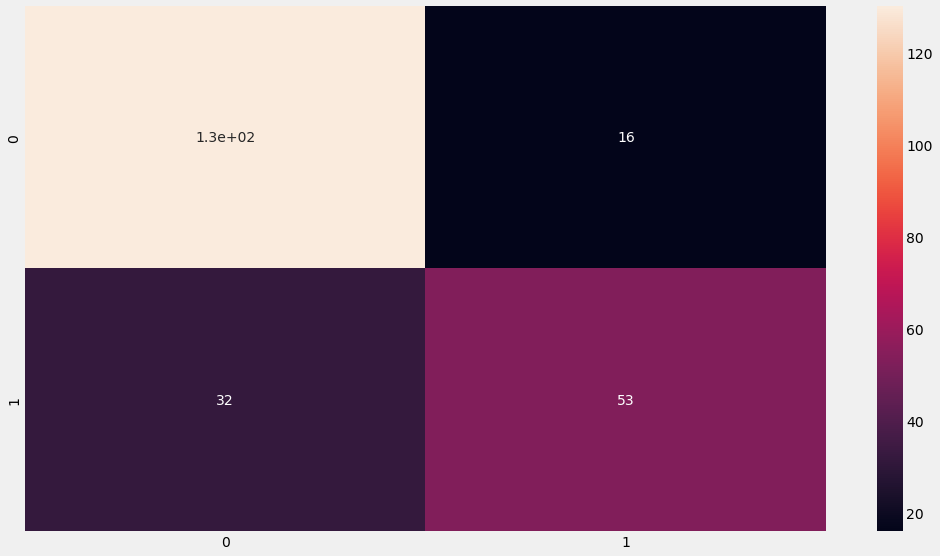

In [23]:
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(16, 9))
sns.heatmap(mat, annot=True)

In [24]:
from sklearn.metrics import classification_report
target_names = ['Diabetes', 'Normal']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Diabetes       0.80      0.89      0.84       146
      Normal       0.77      0.62      0.69        85

    accuracy                           0.79       231
   macro avg       0.79      0.76      0.77       231
weighted avg       0.79      0.79      0.79       231



#ROC Curve

In [25]:
from sklearn.metrics import roc_curve
y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

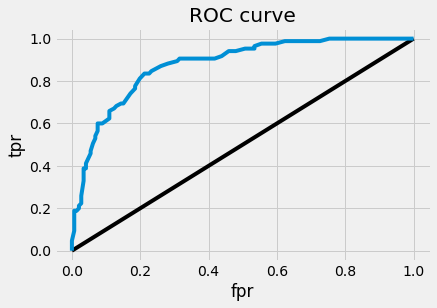

In [26]:
plt.plot([0,1],[0,1],'k-')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [27]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8757050765511684

#For our model, the Area Under the Receiver Operating Characteristic Curve (ROC AUC) score is 87%. This implies that the classification model is good enough to detect the diabetic patient.

#XGBoost model

In [28]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from scipy import stats
from numpy import nan
from imblearn.over_sampling import SMOTE
import pandas
from sklearn.model_selection import train_test_split, KFold, cross_val_score
import sklearn
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.preprocessing import Normalizer
import numpy
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler 
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
import warnings

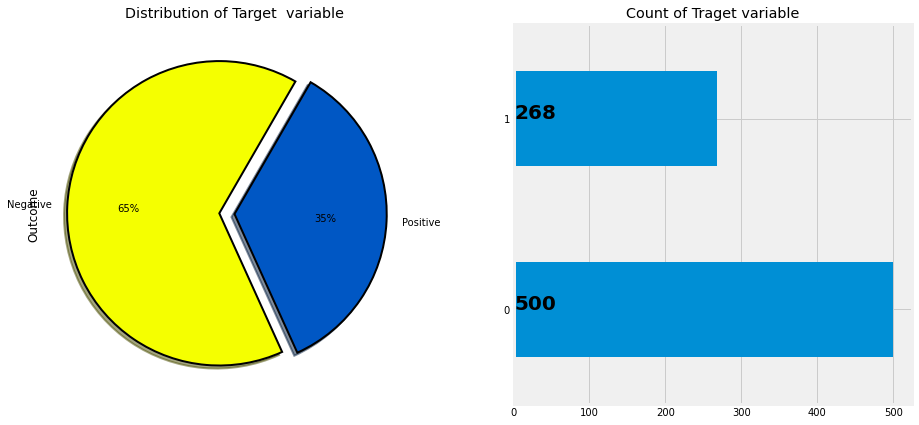

In [30]:
plt.figure(figsize=(14,7))
plt.subplot(121)
df["Outcome"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",7),startangle = 60,labels=["Negative","Positive"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,0],shadow =True)
plt.title("Distribution of Target  variable")

plt.subplot(122)
ax = df["Outcome"].value_counts().plot(kind="barh")

for i,j in enumerate(df["Outcome"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize=20)

plt.title("Count of Traget variable")
plt.show()

#data preprocessing

In [31]:
num_missing = (df[ ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] == 0).sum()
print(num_missing)

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


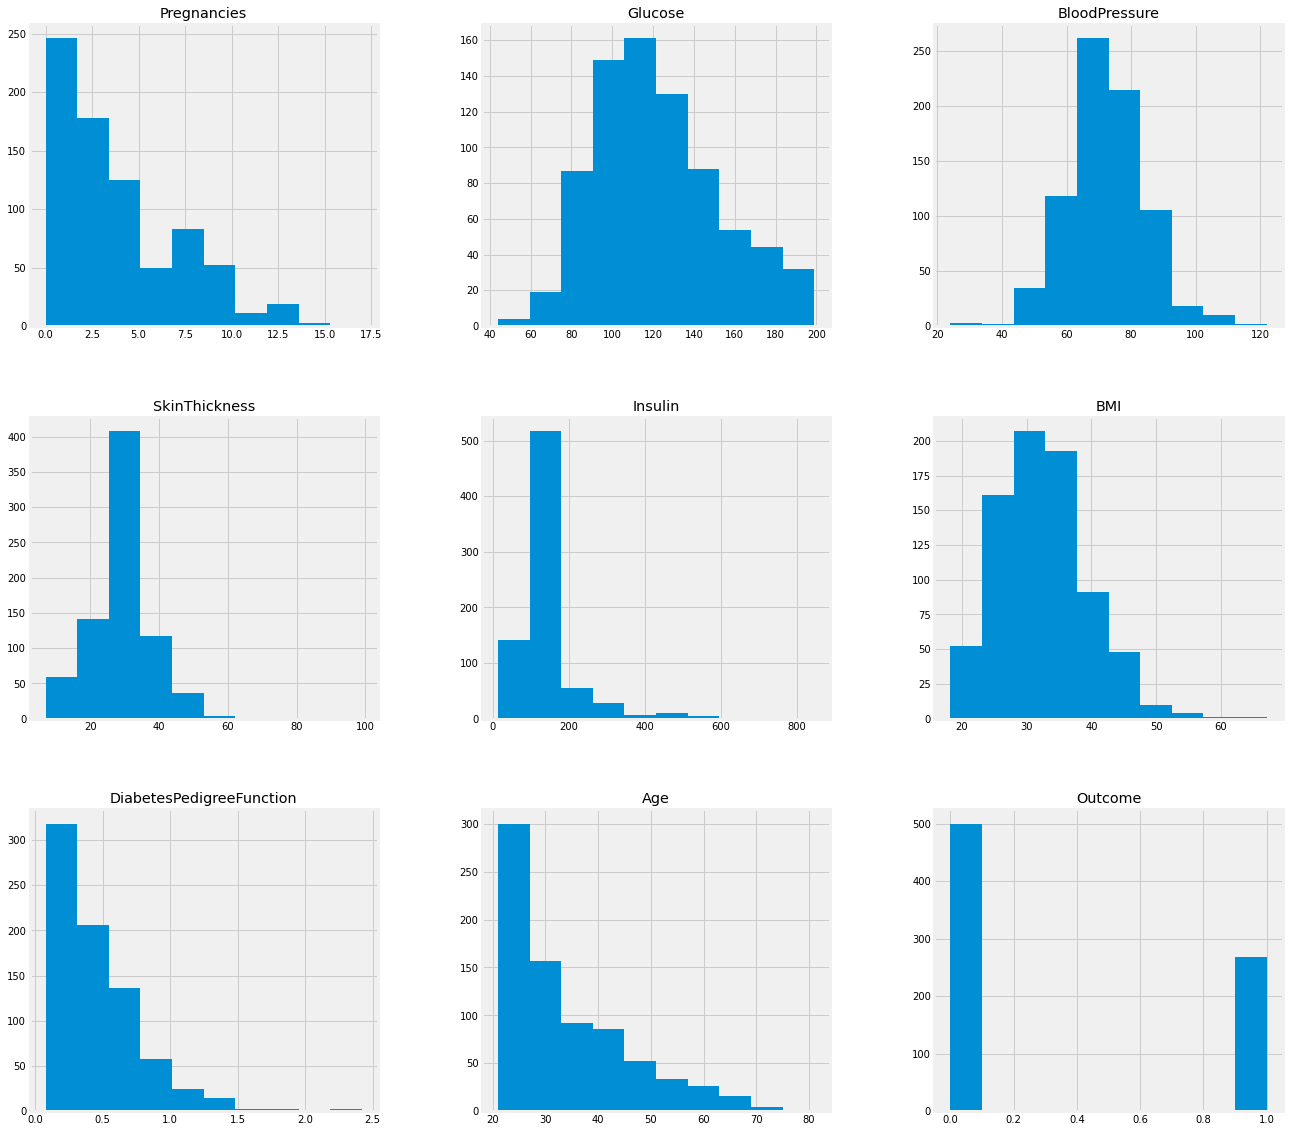

In [32]:
p = df.hist(figsize = (20,20))

# feature scaling

In [33]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [34]:
os = SMOTE(random_state=42)
X_train,y_train = os.fit_resample(X_train, y_train.ravel())

In [35]:
from xgboost import XGBClassifier

In [36]:
xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 180)
xgb.fit(X_train, y_train)

XGBClassifier(max_depth=5, n_estimators=180)

In [37]:
xgb_preds = xgb.predict(X_test)

In [38]:
print(f"Confusion Matrix :- \n{confusion_matrix(y_test, xgb_preds)}\n")
print(f"Classification Report :- \n {classification_report(y_test, xgb_preds)}")

Confusion Matrix :- 
[[115  31]
 [ 26  59]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.82      0.79      0.80       146
           1       0.66      0.69      0.67        85

    accuracy                           0.75       231
   macro avg       0.74      0.74      0.74       231
weighted avg       0.76      0.75      0.75       231



#Bagging model

In [46]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV

pipeline = make_pipeline(StandardScaler(),
                        LogisticRegression(random_state=1))
#
# Fit the model
#
pipeline.fit(X_train, y_train)
#
# Model scores on test and training data
#
print('Model test Score: %.3f, ' %pipeline.score(X_test, y_test),
      'Model training Score: %.3f' %pipeline.score(X_train, y_train))

Model test Score: 0.797,  Model training Score: 0.749


#Feature importance using Random Forest and XGBoost models

Feature Importances :  [0.10022104 0.2667254  0.0782795  0.05920157 0.1061211  0.15261683
 0.09057488 0.14625978]


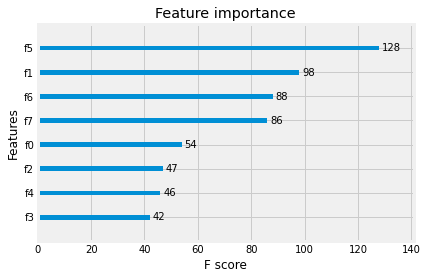

In [47]:
from xgboost import XGBClassifier
from xgboost import plot_importance

# fit model to training data
xgb_model = XGBClassifier(random_state = 0 )
xgb_model.fit(X_train, y_train)

print("Feature Importances : ", xgb_model.feature_importances_)

# plot feature importance
plot_importance(xgb_model)
plt.show()

Feature: 0, Score: 0.00296
Feature: 1, Score: 0.00543
Feature: 2, Score: 0.00287
Feature: 3, Score: 0.00266
Feature: 4, Score: 0.53133
Feature: 5, Score: 0.42026
Feature: 6, Score: 0.02575
Feature: 7, Score: 0.00299
Feature: 8, Score: 0.00322
Feature: 9, Score: 0.00252


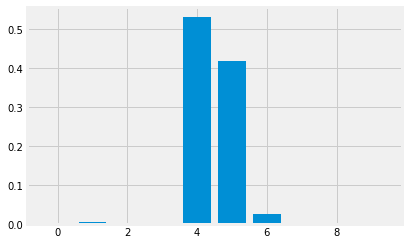

In [49]:
# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# shap

In [51]:
# Generate the Tree explainer and SHAP values
explainer = shap.TreeExplainer(xgb_mod)
shap_values = explainer.shap_values(X)
expected_value = explainer.expected_value

############## visualizations #############
# Generate summary dot plot
shap.summary_plot(shap_values, X,title="SHAP summary plot") 

# Generate summary bar plot 
shap.summary_plot(shap_values, X,plot_type="bar") 

# Generate waterfall plot  
shap.plots._waterfall.waterfall_legacy(expected_value, shap_values[79], features=X.loc[79,:], feature_names=X.columns, max_display=15, show=True)

# Generate dependence plot
shap.dependence_plot("worst concave points", shap_values, X, interaction_index="mean concave points")

# Generate multiple dependence plots
for name in X_train.columns:
     shap.dependence_plot(name, shap_values, X)
shap.dependence_plot("worst concave points", shap_values, X, interaction_index="mean concave points")

# Generate force plot - Multiple rows 
shap.force_plot(explainer.expected_value, shap_values[:100,:], X.iloc[:100,:])

# Generate force plot - Single
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

# Generate Decision plot 
shap.decision_plot(expected_value, shap_values[79],link='logit' ,features=X.loc[79,:], feature_names=(X.columns.tolist()),show=True,title="Decision Plot")


NameError: ignored

In [56]:
! pip install shap

     |████████████████████████████████| 564 kB 4.6 MB/s 


In [58]:
# Generate the Tree explainer and SHAP values
import shap
explainer = shap.TreeExplainer(xgb_mod)
shap_values = explainer.shap_values(X)
expected_value = explainer.expected_value

############## visualizations #############
# Generate summary dot plot
shap.summary_plot(shap_values, X,title="SHAP summary plot") 

# Generate summary bar plot 
shap.summary_plot(shap_values, X,plot_type="bar") 

# Generate waterfall plot  
shap.plots._waterfall.waterfall_legacy(expected_value, shap_values[79], features=X.loc[79,:], feature_names=X.columns, max_display=15, show=True)

# Generate dependence plot
shap.dependence_plot("worst concave points", shap_values, X, interaction_index="mean concave points")

# Generate multiple dependence plots
for name in X_train.columns:
     shap.dependence_plot(name, shap_values, X)
shap.dependence_plot("worst concave points", shap_values, X, interaction_index="mean concave points")

# Generate force plot - Multiple rows 
shap.force_plot(explainer.expected_value, shap_values[:100,:], X.iloc[:100,:])

# Generate force plot - Single
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

# Generate Decision plot 
shap.decision_plot(expected_value, shap_values[79],link='logit' ,features=X.loc[79,:], feature_names=(X.columns.tolist()),show=True,title="Decision Plot")


NameError: ignored